# Grace's WIP file for Project 2
### Machine Learning to recognise ASL digits, then test the same architecture to recognise ASL alphabet.  Are any amendments required?
### Then test whether the model can recognise sign lanuage from other pictures - eg Simpson's hand

In [1]:
# Sources:
    # Initial coding on ASL digits recognition from: https://www.kaggle.com/orhansertkaya/convolutional-neural-network-sign-language-digits

# Part 1: debug & run Kaggle competition's American Sign Language digits recognition model

In [2]:
# Initial Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "./input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

['.ipynb_checkpoints', 'Sign-language-alpha-dataset', 'Sign-language-digits-dataset']


## Load digits dataset

In [3]:
# load data set
x = np.load('./input/Sign-language-digits-dataset/X.npy')
y = np.load('./input/Sign-language-digits-dataset/Y.npy')

(-0.5, 63.5, 63.5, -0.5)

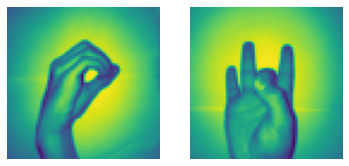

In [4]:
# Show a sample of the images
img_size = 64
plt.subplot(1,2,1)
plt.imshow(x[210].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x[1110].reshape(img_size,img_size))
plt.axis('off')


In [5]:
# As you can see, y (labels) are already one hot encoded
print(f"y-max is: {y.max()}")
print(f"y-min is: {y.min()}")
print(f"y shape is: {y.shape} \n")

# And x (features) are already scaled between 0 and 1
print(f"x-max is: {x.max()}")
print(f"x-min is: {x.min()}")
print(f"x shape is: {x.shape}")

y-max is: 1.0
y-min is: 0.0
y shape is: (2062, 10) 

x-max is: 1.0
x-min is: 0.003921568859368563
x shape is: (2062, 64, 64)


In [6]:
# Now,lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
#reshape
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)
#print x_train and y_train shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1649, 64, 64, 1)
(1649, 10)
(413, 64, 64, 1)
(413, 10)


## Create digits model

In [7]:
# Initial imports (had to amend the RMSprop & Adam import lines)
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential # to create a cnn model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
#from keras.optimizers import RMSprop
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

#from tensorflow.python.keras.models import Sequential
#from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Activation
import keras


In [8]:
# Build the model
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))


# fully connected
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [9]:
# model.build(64,64,1) # `input_shape` is the shape of the input data
                         # e.g. input_shape = (None, 32, 32, 3)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4

In [11]:
# Compile model
# The below 2 lines of original code didn't work.  
#optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
#model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

# Had to amend to this:
model.compile(optimizer= 'adam' , loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [12]:
# Fit the model
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
52/52 [==============================] - 31s 88ms/step - loss: 2.3211 - accuracy: 0.0956 - val_loss: 2.3029 - val_accuracy: 0.0993
Epoch 2/100
52/52 [==============================] - 5s 89ms/step - loss: 2.3030 - accuracy: 0.0913 - val_loss: 2.3019 - val_accuracy: 0.1501
Epoch 3/100
52/52 [==============================] - 4s 79ms/step - loss: 2.3002 - accuracy: 0.1251 - val_loss: 2.3011 - val_accuracy: 0.0775
Epoch 4/100
52/52 [==============================] - 4s 74ms/step - loss: 2.2679 - accuracy: 0.1307 - val_loss: 1.8984 - val_accuracy: 0.2930
Epoch 5/100
52/52 [==============================] - 4s 79ms/step - loss: 1.6101 - accuracy: 0.4030 - val_loss: 0.8295 - val_accuracy: 0.7288
Epoch 6/100
52/52 [==============================] - 4s 74ms/step - loss: 0.9256 - accuracy: 0.6667 - val_loss: 0.6376 - val_accuracy: 0.7797
Epoch 7/100
52/52 [==============================] - 4s 78ms/step - loss: 0.6075 - accuracy: 0.7982 - val_loss: 0.4013 - val_accuracy: 0.8838
Epoch

## Evaluate Digits Model

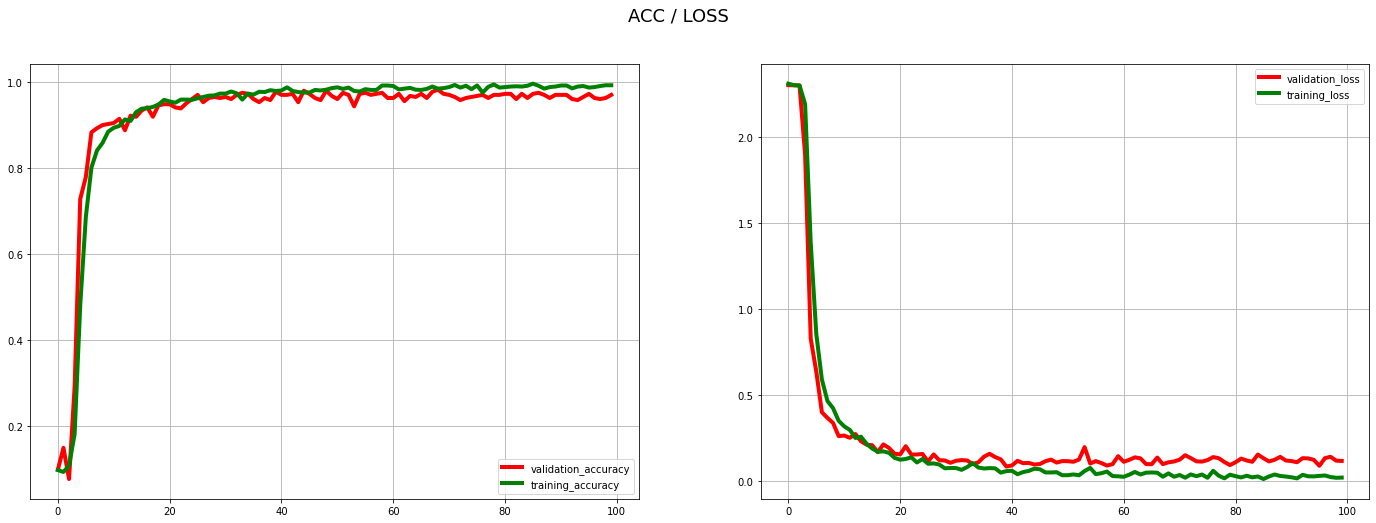

In [13]:
# Evaluate Model
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history.history["val_accuracy"], label="validation_accuracy", c="red", linewidth=4)
plt.plot(history.history["accuracy"], label="training_accuracy", c="green", linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history["val_loss"], label="validation_loss", c="red", linewidth=4)
plt.plot(history.history["loss"], label="training_loss", c="green", linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

In [14]:
print('Train accuracy of the model: ',history.history['accuracy'][-1])

Train accuracy of the model:  0.9933292865753174


In [15]:
print('Train loss of the model: ',history.history['loss'][-1])

Train loss of the model:  0.02138596959412098


In [16]:
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])

Validation accuracy of the model:  0.9709442853927612


In [17]:
print('Validation loss of the model: ',history.history['val_loss'][-1])

Validation loss of the model:  0.11837790906429291


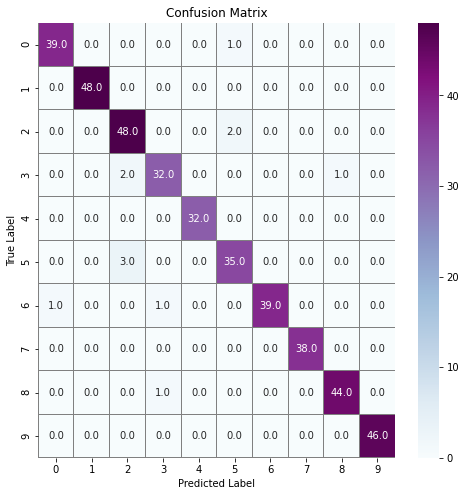

In [18]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Part 2 - expand dataset to include American Sign Language alphabet symbols and test model on new dataset

## Load ASL alphabet symbols

In [19]:
# Dataset Source: https://www.kaggle.com/datamunge/sign-language-mnist?select=sign_mnist_test

In [20]:
# Initial Imports
from pathlib import Path


In [21]:
# Import Data (data already split into train and test datasets): 
filepath = Path("./input/Sign-language-alpha-dataset/sign_mnist_train.csv")
alpha_train_df = pd.read_csv(filepath)

filepath = Path("./input/Sign-language-alpha-dataset/sign_mnist_test.csv")
alpha_test_df = pd.read_csv(filepath)


In [22]:
# In this dataset (similar to the MNist dataset):
# refer: https://www.kaggle.com/shahules/indian-way-to-learn-cnn
# Label is the designation of which alphabet letter the image relates to.
# Pixel0 to Pixel783: These are the pixel values of the image metrics. That is each row contains 28 * 28 = 784 (0-783 here) values here.
# Each one of these values indicates the pixel value at i x 28 + j th pixel position in the image metric.


In [23]:
alpha_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [24]:
alpha_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [25]:
# Assign X & y for train dataset
X_alpha_train = alpha_train_df.drop(columns='label')
X_alpha_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [26]:
# convert to X & y values
X_alpha_train = alpha_train_df.drop(columns='label').values
y_alpha_train = alpha_train_df['label'].values

In [27]:
X_alpha_train.shape

(27455, 784)

In [28]:
# Normalize Training Pixel Values
# refer: https://www.kaggle.com/shahules/indian-way-to-learn-cnn
# For most image data, the pixel values are integers with values between 0 and 255.
# To assist the Neural network,normalize the pixel values so that each pixel value has a value between 0 and 1.
# This can be achieved by dividing all pixels values by the largest pixel value; that is 255. 
# This is performed across all channels, regardless of the actual range of pixel values that are present in the image.

X_alpha_train = X_alpha_train/255


In [29]:
X_alpha_train

array([[0.41960784, 0.4627451 , 0.49803922, ..., 0.8       , 0.79607843,
        0.79215686],
       [0.60784314, 0.61568627, 0.61176471, ..., 0.40392157, 0.52941176,
        0.58431373],
       [0.73333333, 0.7372549 , 0.7372549 , ..., 0.76470588, 0.76078431,
        0.76470588],
       ...,
       [0.68235294, 0.68235294, 0.68235294, ..., 0.79215686, 0.78431373,
        0.78431373],
       [0.69411765, 0.70980392, 0.72156863, ..., 0.25098039, 0.34117647,
        0.36470588],
       [0.70196078, 0.70588235, 0.70588235, ..., 0.80392157, 0.81960784,
        0.84313725]])

In [30]:
y_alpha_train.shape

(27455,)

In [31]:
# Assign X & y for test dataset
X_alpha_test = alpha_test_df.drop(columns='label')
X_alpha_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [32]:
# Normalize Testing Pixel Values
# refer: https://www.kaggle.com/shahules/indian-way-to-learn-cnn
# For most image data, the pixel values are integers with values between 0 and 255.
# To assist the Neural network,normalize the pixel values so that each pixel value has a value between 0 and 1.
# This can be achieved by dividing all pixels values by the largest pixel value; that is 255. 
# This is performed across all channels, regardless of the actual range of pixel values that are present in the image.

X_alpha_test = X_alpha_test/255


In [33]:
X_alpha_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.584314,0.584314,0.588235,0.588235,0.588235,0.592157,0.592157,0.588235,0.592157,0.596078,...,0.541176,0.580392,0.498039,0.349020,0.321569,0.376471,0.415686,0.439216,0.470588,0.419608
1,0.494118,0.501961,0.513725,0.517647,0.521569,0.525490,0.529412,0.529412,0.533333,0.541176,...,0.184314,0.407843,0.760784,0.717647,0.729412,0.721569,0.721569,0.721569,0.713725,0.705882
2,0.333333,0.345098,0.360784,0.376471,0.411765,0.482353,0.529412,0.560784,0.576471,0.596078,...,0.266667,0.650980,0.949020,0.890196,0.901961,0.890196,0.886275,0.882353,0.878431,0.870588
3,0.796078,0.803922,0.811765,0.807843,0.811765,0.819608,0.823529,0.819608,0.823529,0.819608,...,0.603922,0.972549,0.968627,0.972549,0.992157,0.925490,0.901961,0.941176,0.992157,1.000000
4,0.737255,0.749020,0.756863,0.764706,0.780392,0.788235,0.792157,0.796078,0.796078,0.796078,...,0.101961,0.156863,0.250980,0.188235,0.113725,0.180392,0.192157,0.180392,0.180392,0.207843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,0.529412,0.466667,0.423529,0.400000,0.411765,0.388235,0.239216,0.403922,0.474510,0.521569,...,0.423529,0.439216,0.454902,0.447059,0.462745,0.705882,0.721569,0.690196,0.654902,0.639216
7168,0.615686,0.623529,0.631373,0.643137,0.650980,0.650980,0.670588,0.682353,0.686275,0.690196,...,0.835294,0.835294,0.835294,0.839216,0.835294,0.827451,0.823529,0.823529,0.819608,0.815686
7169,0.745098,0.749020,0.745098,0.749020,0.745098,0.745098,0.752941,0.752941,0.749020,0.752941,...,0.847059,0.843137,0.835294,0.839216,0.839216,0.835294,0.823529,0.827451,0.819608,0.815686
7170,0.788235,0.803922,0.815686,0.819608,0.839216,0.847059,0.854902,0.874510,0.886275,0.898039,...,0.439216,0.662745,1.000000,1.000000,0.929412,0.443137,0.356863,0.262745,0.274510,0.247059


In [34]:
# convert to X & y values
X_alpha_test = alpha_test_df.drop(columns='label').values

In [35]:
y_alpha_test = alpha_test_df['label'].values

In [36]:
X_alpha_test.shape

(7172, 784)

In [37]:
y_alpha_test.shape

(7172,)

In [38]:
X_alpha_train = X_alpha_train.reshape(-1,28,28,1)
X_alpha_test = X_alpha_test.reshape(-1,28,28,1)
#print x_train and y_train shape
print(X_alpha_train.shape)
print(y_alpha_train.shape)
print(X_alpha_test.shape)
print(y_alpha_test.shape)


(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


In [39]:
# Encoding Target Values
# refer: https://www.kaggle.com/shahules/indian-way-to-learn-cnn
y_alpha_train=to_categorical(y_alpha_train)
y_alpha_test=to_categorical(y_alpha_test)

In [52]:
print(X_alpha_train.shape)
print(y_alpha_train.shape)
print(X_alpha_test.shape)
print(y_alpha_test.shape)

(27455, 28, 28, 1)
(27455, 25)
(7172, 28, 28, 1)
(7172, 25)


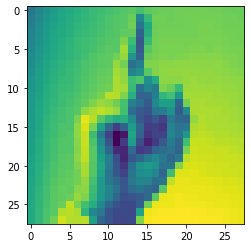

In [40]:
# show some sample letters
plt.imshow(X_alpha_train[0][:,:,0])

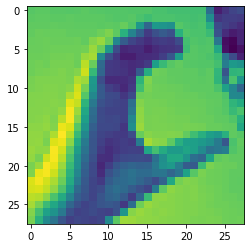

In [41]:
plt.imshow(X_alpha_train[2][:,:,0])

### Amend Model

In [47]:
# Adjust model for amended input size (28 x 28, rather than 64 x 64 previously)
# Build the model - using original model didn't work.  Trying different model:
# source: https://www.kaggle.com/shahules/indian-way-to-learn-cnn
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization

model2 = Sequential()

model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model2.add(BatchNormalization(momentum=.15))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))


model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(BatchNormalization(momentum=0.15))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model2.add(BatchNormalization(momentum=.15))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dense(256, activation = "relu"))
model2.add(Dropout(0.4))
model2.add(Dense(25, activation = "softmax"))

In [48]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)       

In [49]:
# Compile model
# The below 2 lines of original code didn't work.  
#optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
#model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

# Had to amend to this:
model2.compile(optimizer= 'adam' , loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [50]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_alpha_train)

In [51]:
# Fit the model
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs=5 #change this to 30 if you need to get better score
batch_size=64

history = model2.fit_generator(datagen.flow(X_alpha_train,y_alpha_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_alpha_test,y_alpha_test),
                              verbose = 2, steps_per_epoch=X_alpha_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/5
428/428 - 124s - loss: 1.7575 - accuracy: 0.4534 - val_loss: 141.3053 - val_accuracy: 0.4177
Epoch 2/5
428/428 - 119s - loss: 0.4368 - accuracy: 0.8510 - val_loss: 82.8811 - val_accuracy: 0.6425
Epoch 3/5
428/428 - 130s - loss: 0.1885 - accuracy: 0.9358 - val_loss: 72.1564 - val_accuracy: 0.6262
Epoch 4/5
428/428 - 148s - loss: 0.1266 - accuracy: 0.9582 - val_loss: 74.0488 - val_accuracy: 0.6497
Epoch 5/5
428/428 - 144s - loss: 0.0841 - accuracy: 0.9721 - val_loss: 35.3917 - val_accuracy: 0.7786
